In [122]:
import pandas as pd
import re

GCP does not allow downloading more than 16000 records, whereas the dataset is much larger than that. Hence, we have downloaded data in months, and are creating a dataframe by combining them. For this submission, we are using data from January to June.

In [124]:
data_file = './data/weather_history_daily_2016_jan.csv'
jan_df = pd.read_csv(data_file) 
data_file = './data/weather_history_daily_2016_feb.csv'
feb_df = pd.read_csv(data_file) 
data_file = './data/weather_history_daily_2016_mar.csv'
mar_df = pd.read_csv(data_file) 
data_file = './data/weather_history_daily_2016_apr.csv'
apr_df = pd.read_csv(data_file) 
data_file = './data/weather_history_daily_2016_may.csv'
may_df = pd.read_csv(data_file) 
data_file = './data/weather_history_daily_2016_jun.csv'
jun_df = pd.read_csv(data_file) 

zip_data = './data/uszips.csv'
postal_code_df = pd.read_csv(zip_data)
postal_code_df = postal_code_df.drop(postal_code_df.columns[[1,2,6,7,8,9,10,11,12,13,14,15,16,17]], axis=1)
postal_code_df.rename(columns={'zip': 'postal_code'}, inplace=True)

In [128]:
weather_df = pd.concat([jan_df, feb_df, mar_df, apr_df, may_df, jun_df])
weather_df.reset_index(inplace=True)

### The Existing Dataset does not contain City and State Names. We will require these to filter data based on a particular region by name rather than the zip code. So we are performing a left outer join of our weather_df with a list of cities corresponding to the postal_code -

In [129]:
weather_df = pd.merge(weather_df, postal_code_df, on=['postal_code','postal_code'], how='left')
weather_df.drop(['index'], axis=1, inplace=True)
weather_df

,postal_code,country,date_valid_std,doy_std,min_temperature_air_2m_f,avg_temperature_air_2m_f,max_temperature_air_2m_f,min_temperature_wetbulb_2m_f,avg_temperature_wetbulb_2m_f,max_temperature_wetbulb_2m_f,...,min_cloud_cover_tot_pct,avg_cloud_cover_tot_pct,max_cloud_cover_tot_pct,min_radiation_solar_total_wpm2,avg_radiation_solar_total_wpm2,max_radiation_solar_total_wpm2,tot_radiation_solar_total_wpm2,city,state_id,state_name
0,77725,US,2016-01-01,1,44.47,46.50,48.69,40.27,42.31,44.97,...,20,84,100,0.0,69.0,351.0,1656.0,NaN,NaN,NaN
1,77703,US,2016-01-01,1,44.47,46.50,48.69,40.27,42.31,44.97,...,20,84,100,0.0,69.0,351.0,1656.0,Beaumont,TX,Texas
2,70653,US,2016-01-01,1,41.72,44.73,49.95,38.59,40.96,43.85,...,8,59,100,0.0,66.8,261.0,1604.0,Merryville,LA,Louisiana
3,77615,US,2016-01-01,1,42.73,45.30,48.56,39.68,42.01,44.65,...,2,71,100,0.0,71.0,370.0,1704.0,Evadale,TX,Texas
4,76436,US,2016-01-01,1,35.89,39.68,44.53,33.52,36.11,37.94,...,48,90,100,0.0,112.7,505.0,2704.0,Carlton,TX,Texas
5,75109,US,2016-01-01,1,37.02,40.88,44.17,34.97,37.56,39.13,...,26,88,100,0.0,103.8,442.0,2492.0,Corsicana,TX,Texas
6,75752,US,2016-01-01,1,37.08,40.80,46.00,35.07,37.29,40.81,...,28,87,100,0.0,93.8,418.0,2252.0,Athens,TX,Texas
7,75143,US,2016-01-01,1,36.88,40.69,45.81,35.05,37.44,40.12,...,30,86,100,0.0,110.3,468.0,2648.0,Kemp,TX,Texas
8,71450,US,2016-01-01,1,41.86,44.63,48.69,37.92,39.65,41.63,...,4,75,100,0.0,65.3,355.0,1567.0,Marthaville,LA,Louisiana
9,76446,US,2016-01-01,1,35.60,39.29,43.03,33.04,35.46,37.61,...,32,88,100,0.0,115.2,514.0,2764.0,Dublin,TX,Texas


# Visualising Data

Let us Visualize the Min, Max and Average Temperature. For now, lets consider a specific region, Charlotte.
Below we create CLT_df which contains the same columns as above DF, but filtered for the city of Charlotte.

In [130]:
CLT_df = weather_df.where(weather_df['state_id']=='NC').dropna().where(weather_df['city']=='Charlotte').dropna()
CLT_df

,postal_code,country,date_valid_std,doy_std,min_temperature_air_2m_f,avg_temperature_air_2m_f,max_temperature_air_2m_f,min_temperature_wetbulb_2m_f,avg_temperature_wetbulb_2m_f,max_temperature_wetbulb_2m_f,...,min_cloud_cover_tot_pct,avg_cloud_cover_tot_pct,max_cloud_cover_tot_pct,min_radiation_solar_total_wpm2,avg_radiation_solar_total_wpm2,max_radiation_solar_total_wpm2,tot_radiation_solar_total_wpm2,city,state_id,state_name
2643,28217.0,US,2016-01-03,3.0,30.25,40.30,53.20,29.91,36.53,43.53,...,0.0,21.0,100.0,0.0,119.7,491.0,2873.0,Charlotte,NC,North Carolina
3272,28204.0,US,2016-01-04,4.0,29.21,36.08,41.54,25.50,31.80,35.40,...,0.0,12.0,58.0,0.0,138.8,564.0,3330.0,Charlotte,NC,North Carolina
3273,28207.0,US,2016-01-04,4.0,29.21,36.08,41.54,25.50,31.80,35.40,...,0.0,12.0,58.0,0.0,138.8,564.0,3330.0,Charlotte,NC,North Carolina
3274,28282.0,US,2016-01-04,4.0,29.21,36.08,41.54,25.50,31.80,35.40,...,0.0,12.0,58.0,0.0,138.8,564.0,3330.0,Charlotte,NC,North Carolina
3282,28203.0,US,2016-01-04,4.0,29.21,36.08,41.54,25.50,31.80,35.40,...,0.0,12.0,58.0,0.0,138.8,564.0,3330.0,Charlotte,NC,North Carolina
3332,28226.0,US,2016-01-04,4.0,28.81,36.26,41.97,25.47,32.11,35.68,...,0.0,11.0,54.0,0.0,139.2,566.0,3342.0,Charlotte,NC,North Carolina
4788,28205.0,US,2016-01-06,6.0,21.88,32.92,43.93,19.15,29.45,38.55,...,0.0,38.0,90.0,0.0,140.7,571.0,3377.0,Charlotte,NC,North Carolina
5012,28210.0,US,2016-01-06,6.0,21.54,32.91,44.37,19.19,29.48,38.81,...,0.0,40.0,90.0,0.0,141.0,567.0,3383.0,Charlotte,NC,North Carolina
5228,28226.0,US,2016-01-07,7.0,34.38,43.28,55.80,33.69,40.77,48.99,...,0.0,48.0,100.0,0.0,130.4,548.0,3129.0,Charlotte,NC,North Carolina
7889,28204.0,US,2016-01-12,12.0,27.43,39.07,50.34,25.39,33.44,41.38,...,0.0,2.0,30.0,0.0,138.3,573.0,3319.0,Charlotte,NC,North Carolina


In [131]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

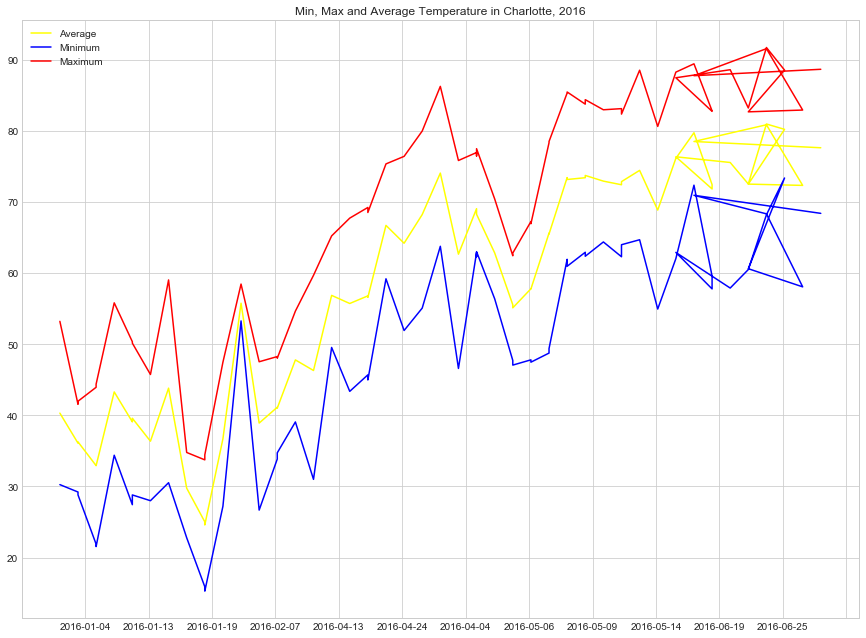

In [132]:
fig = plt.figure(figsize=(15,11))
ax = plt.axes()

ax.plot(CLT_df['date_valid_std'], CLT_df['avg_temperature_air_2m_f'], color = 'yellow', label = 'Average')
ax.plot(CLT_df['date_valid_std'], CLT_df['min_temperature_air_2m_f'], color = 'blue', label = 'Minimum')
ax.plot(CLT_df['date_valid_std'], CLT_df['max_temperature_air_2m_f'], color = 'red', label = 'Maximum')

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3.5))
ax.set_title('Min, Max and Average Temperature in Charlotte, 2016')
ax.legend(loc="upper left")


## Lets Check which regions had their Maximum Temperature above 80 degree Fahrenheit in the Month of May -

In [139]:
df_above_80 = weather_df.where(weather_df['date_valid_std']>'2016-04-30').dropna().where(weather_df['date_valid_std']<'2016-06-01').dropna()
df_above_80 = df_above_80[df_above_80['max_temperature_air_2m_f'] > 80].dropna()
df_above_80

,postal_code,country,date_valid_std,doy_std,min_temperature_air_2m_f,avg_temperature_air_2m_f,max_temperature_air_2m_f,min_temperature_wetbulb_2m_f,avg_temperature_wetbulb_2m_f,max_temperature_wetbulb_2m_f,...,min_cloud_cover_tot_pct,avg_cloud_cover_tot_pct,max_cloud_cover_tot_pct,min_radiation_solar_total_wpm2,avg_radiation_solar_total_wpm2,max_radiation_solar_total_wpm2,tot_radiation_solar_total_wpm2,city,state_id,state_name
64122,92258.0,US,2016-05-01,122.0,55.09,70.88,84.51,49.64,57.44,63.14,...,0.0,10.0,28.0,0.0,196.0,972.0,4705.0,North Palm Springs,CA,California
64140,93312.0,US,2016-05-01,122.0,51.96,70.25,85.64,47.78,56.94,63.96,...,0.0,19.0,98.0,0.0,320.9,991.0,7700.5,Bakersfield,CA,California
64154,93461.0,US,2016-05-01,122.0,43.68,63.70,80.44,39.80,52.22,60.65,...,0.0,6.0,26.0,0.0,313.8,934.0,7531.0,Shandon,CA,California
64173,95070.0,US,2016-05-01,122.0,53.35,67.28,82.02,48.45,55.94,62.89,...,0.0,6.0,24.0,0.0,338.3,997.0,8120.0,Saratoga,CA,California
64181,95014.0,US,2016-05-01,122.0,53.55,68.28,84.16,49.14,56.46,63.50,...,0.0,6.0,24.0,0.0,338.3,997.0,8120.0,Cupertino,CA,California
64182,94087.0,US,2016-05-01,122.0,53.55,68.28,84.16,49.14,56.46,63.50,...,0.0,6.0,24.0,0.0,338.3,997.0,8120.0,Sunnyvale,CA,California
64183,32605.0,US,2016-05-01,122.0,69.94,79.39,90.90,68.56,70.25,71.88,...,0.0,4.0,18.0,0.0,295.3,989.0,7087.5,Gainesville,FL,Florida
64184,32607.0,US,2016-05-01,122.0,69.48,79.32,91.58,68.22,70.21,72.01,...,0.0,4.0,14.0,0.0,295.3,989.0,7087.5,Gainesville,FL,Florida
64204,92275.0,US,2016-05-01,122.0,63.01,75.09,86.47,53.99,59.73,64.90,...,0.0,8.0,40.0,0.0,302.5,999.0,7259.0,Salton City,CA,California
64205,38826.0,US,2016-05-01,122.0,62.13,70.10,80.02,61.07,66.57,71.33,...,0.0,62.0,100.0,0.0,261.7,706.0,6280.5,Belden,MS,Mississippi
